# Predict sales revenue

Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
pwd()

'/content'

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
demo = pd.read_csv("/gdrive/My Drive/General Machine Learning Training/Concrete Case Study/concrete.csv")
demo.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
demo.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(demo)
sweet_report.show_html('sweet_report.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.8 MB/s 


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
data = demo

# Explore the data set

# Visualize pairwise correlations

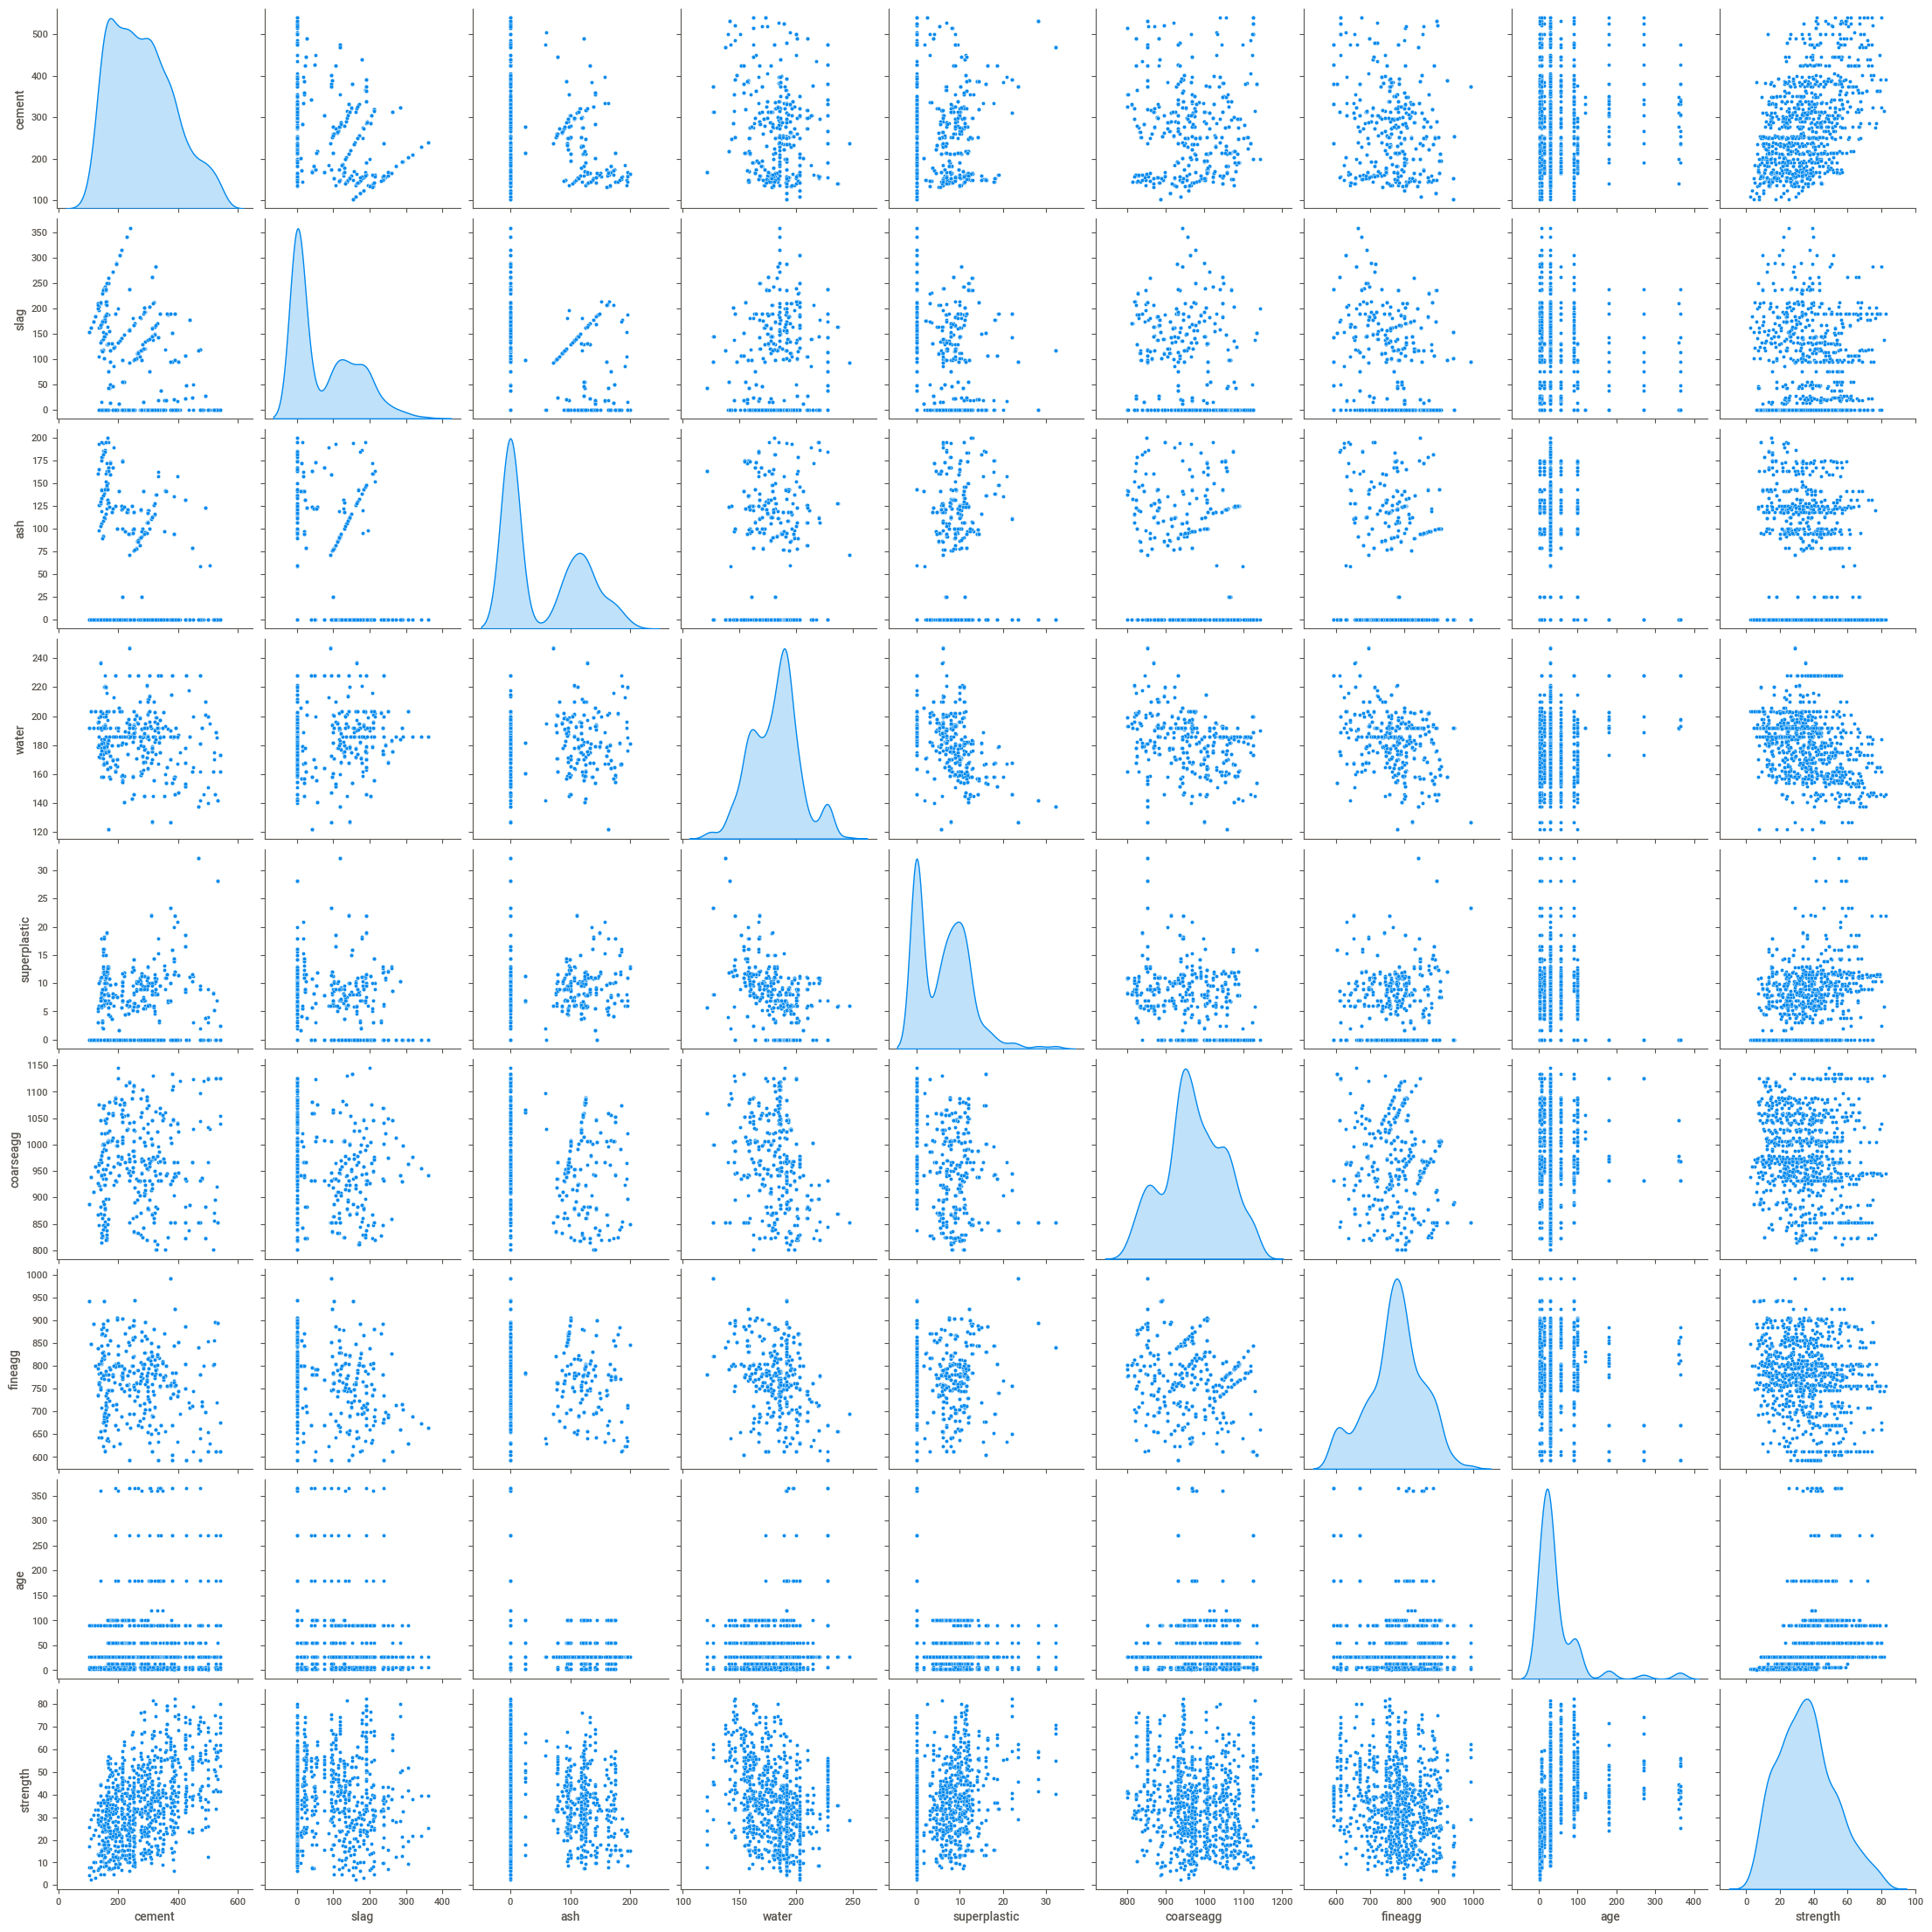

In [8]:
sns.pairplot( data , diag_kind='kde')

Any observations from the above graph?

Calculate correlations

In [9]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Visualize the correlations

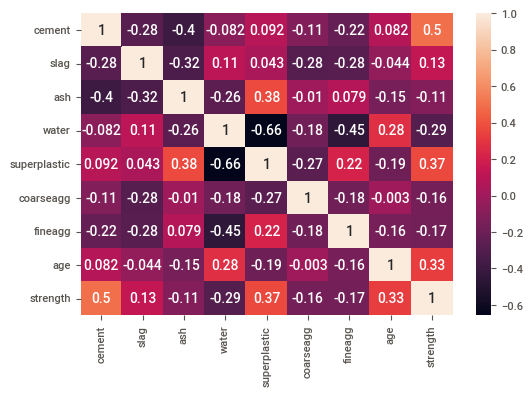

In [10]:
sns.heatmap( data.corr(), annot=True)

In [21]:
from sklearn import metrics
X = data.drop('strength',axis=1)
y = data[["strength"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
print(model2.coef_)
print(model2.intercept_)
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

[[ 0.12068077  0.10914187  0.08314973 -0.12390371  0.37033463  0.02439871
   0.02402977  0.12431106]]
[-38.18197199]
Training R2
0.6374354064424277
Testing R2
0.5022375995887235


In [23]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.metrics import mean_squared_error
pt = PowerTransformer()
powerXtrain = pt.fit_transform(x_train)
powerXtest = pt.transform(x_test)
lr=LinearRegression()
lr.fit(powerXtrain,y_train)
print("Training R2")
print(lr.score(powerXtrain,y_train))
print("Testing R2")
print(lr.score(powerXtest,y_test))
predicted = lr.predict(powerXtest)

Training R2
0.8069340750893381
Testing R2
0.7878651829285565


In [26]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))

Training R2
0.8069340750893381
Testing R2
0.7878651829285565


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("sc", StandardScaler()),
("poly", PolynomialFeatures(degree=3)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))

Training R2
0.9270872117188811
Testing R2
0.8957011796187071


In [31]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,x_train,y_train,cv=10)
print(scoreslr)

[0.85237106 0.86472991 0.92631798 0.79031324 0.71560358 0.84370923
 0.84406905 0.83722564 0.8710841  0.7868373 ]


In [32]:
import numpy as np
np.mean(scoreslr)

0.8332261105080541

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=500)),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))

Training R2
0.983095551820601
Testing R2
0.9475814545789134


Automatically created module for IPython interactive environment


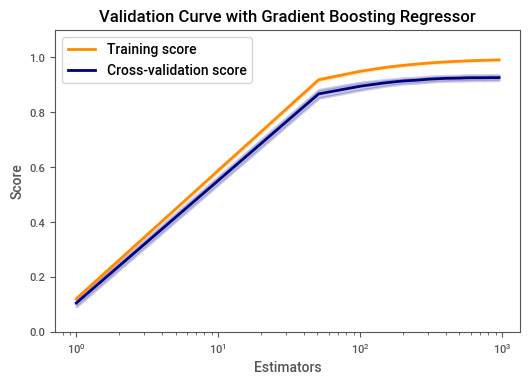

In [35]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,1000,50)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), x_train,y_train, param_name="n_estimators", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()